<h1><center>Abstract</center><h1>
<h2>A renowned cosmetics brand is spending a good amount of time and efforts in various marketing platforms in order to improve its brand value which in turn hopefully be converted to sales. 
The Management especially is interested in knowing about the social media promotions. The company has been posting various content on its Facebook (FB) page and wants to know how people are reacting to the marketing campaign that are taking place on that page. Company wants to analyse the efficiency of their Facebook page by using the performance metrics provided by Facebook Insights (Joss, 2012). 
This should help the company to determine the factors affecting the reachability and improve the content of the page, so that the page is more effective in reaching to the customers. Thereby improving the brands visibility, this might in turn increase the profits in the due course. </h2>

## Lum Kok Keong (P7320307)
## NSDAI2 Class 2 (Thursday)

### References resources used as follow :
   ####    1. http://dx.doi.org/10.1016/j.jbusres.2016.02.010
   ####    2. https://snap.stanford.edu/proj/socmedia-kdd/
 
We will be using 6 different stages as follow :
-       I - Exploratory data analysis
-      II - Feature engineering
-     III - Modeling
-      IV - Hyperparameters tuning
-       V - Saving the trained Model
-      VI - Submission of test data and results

This is for the Target : Lifetime Post Total Impressions

<h1><center>Dataset description</center><h1>
<h2>We are given a dataset that contains various metrics of the cosmetic brand’s Facebook page.  
The dataset is the composition of all the posts that are posted on the brand’s Facebook page for the year of 2014. 
The given Dataset consists of 500 rows (posts) and 19 columns (metrics). In these 19 different parameters for all
the related posts, there is a composition of both categorical and numerical data.
The first 7 colimns are the features / predictators while the rest 12 colmnus are the targets.<h2>


<h1><center>I - Exploratory data analysis</center></h1>   

In [2]:
#=========================================================================
# Import all necessary libraries
#=========================================================================

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plot matplotlib graph
#%matplotlib inline

#=========================================================================
# Read facebook metric data using pandas and first 5 rows of data
#=========================================================================

FB_df =pd.read_csv('dataset_Facebook.csv', sep=';')
FB_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
#=========================================================================
# As we can see that few columns are having very long names by the default 
# way from which they are read in. We shorten the field names by renaming 
# them for coding comfort. The new column names will be used in the place 
# of actual column names for referencing. But the Interpretation will 
# remain the same. Below are the renamed Columns.
#=========================================================================
FB_df_rename = FB_df.rename(columns={'Page total likes':'Page_Likes',
                                     'Post Month':'Month',
                                     'Post Weekday':'Weekday',
                                     'Post Hour':'Hour',
                                     'Lifetime Post Total Reach':'Reach',
                                     'Lifetime Post Total Impressions':'Impression',
                                     'Lifetime Engaged Users':'Engage',
                                     'Lifetime Post Consumers':'Consumers',
                                     'Lifetime Post Consumptions':'Consumptions',
                                     'Lifetime Post Impressions by people who have liked your Page':'Impression_ByLike',
                                     'Lifetime Post reach by people who like your Page':'Reach_ByLike',
                                     'Lifetime People who have liked your Page and engaged with your post':'Engage_ByLike',
                                     'Total Interactions':'Interactions'
                                    })
FB_df_rename.head()

,Page_Likes,Type,Category,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,Impression_ByLike,Reach_ByLike,Engage_ByLike,comment,like,share,Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
#=========================================================================
# Read Facebook metric data statistics 
#=========================================================================

FB_df_rename.describe()

,Page_Likes,Category,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,Impression_ByLike,Reach_ByLike,Engage_ByLike,comment,like,share,Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [5]:
#=========================================================================================================
# Read Facebook metric data any missing data 
#
# The count variable shows that 1 value are missing in the Paid & Like columns, Share has 4 missing 
# 
#=========================================================================================================

FB_df_rename.count()

Page_Likes           500
Type                 500
Category             500
Month                500
Weekday              500
Hour                 500
Paid                 499
Reach                500
Impression           500
Engage               500
Consumers            500
Consumptions         500
Impression_ByLike    500
Reach_ByLike         500
Engage_ByLike        500
comment              500
like                 499
share                496
Interactions         500
dtype: int64

In [6]:
FB_df_rename.dtypes

Page_Likes             int64
Type                  object
Category               int64
Month                  int64
Weekday                int64
Hour                   int64
Paid                 float64
Reach                  int64
Impression             int64
Engage                 int64
Consumers              int64
Consumptions           int64
Impression_ByLike      int64
Reach_ByLike           int64
Engage_ByLike          int64
comment                int64
like                 float64
share                float64
Interactions           int64
dtype: object

In [7]:
#=========================================================================================================
# Read Facebook metric data Correlation Details 
#
# Since the first 7 olumns are the features, we would only want to know the features correlations 
# Seems like Page_Likes & Month has the highest positive Correlations
#=========================================================================================================

FB_df_features = FB_df_rename[['Page_Likes','Type','Category','Month','Weekday','Hour','Paid']]
FB_df_features.corr()

,Page_Likes,Category,Month,Weekday,Hour,Paid
Page_Likes,1.000000,-0.091142,0.941192,-0.005401,-0.143807,0.005341
Category,-0.091142,1.000000,-0.127690,-0.053239,-0.107383,-0.022474
Month,0.941192,-0.127690,1.000000,0.017050,-0.176390,-0.018934
Weekday,-0.005401,-0.053239,0.017050,1.000000,0.045857,-0.001963
Hour,-0.143807,-0.107383,-0.176390,0.045857,1.000000,-0.069464
Paid,0.005341,-0.022474,-0.018934,-0.001963,-0.069464,1.000000


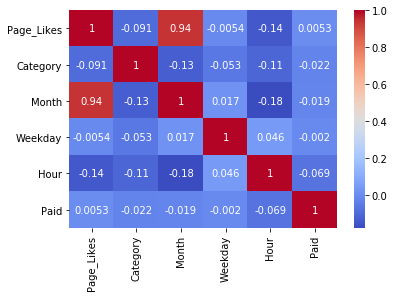

In [8]:
from pandas.plotting import scatter_matrix
import seaborn as sns

# Visualise correlation matrix
sns.heatmap(FB_df_features.corr(), annot=True, cmap='coolwarm')

#scatter_matrix(FB_df_features, alpha=0.2, figsize=(20, 20), diagonal='kde')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


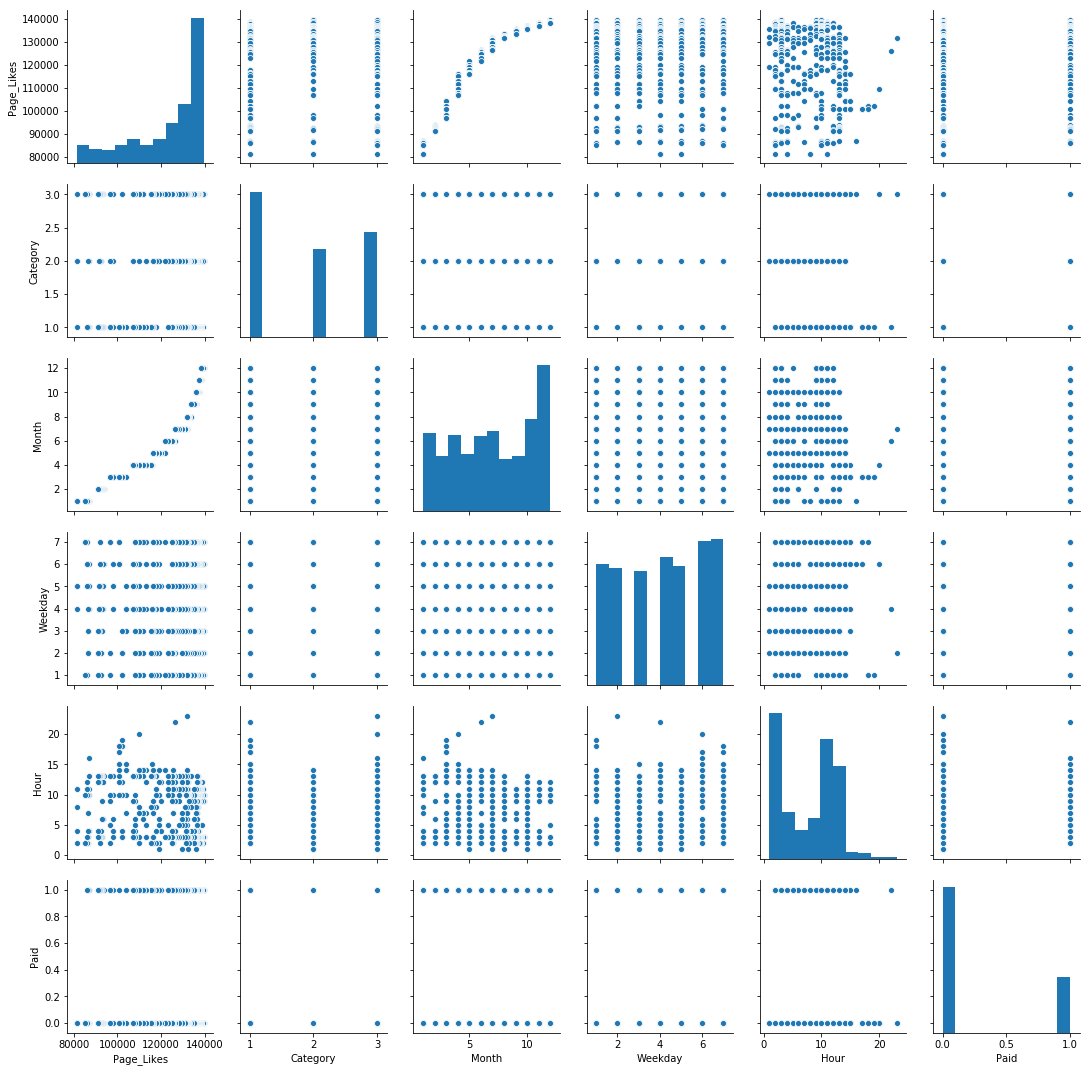

In [9]:
# Visualise pairwise relationship using Seaborn pairplot
sns.pairplot(FB_df_features);

### For extracting knowledge from the “Lifetime Post Total Impressions” implemented model, a data analysis was performed via two approaches: 
    - ﬁrst, the model was assessed to understand which of the input features affected more the outcome 
      of the studied metric; 
    - second, all input features from the most to the least relevant for the model were assessed to 
      discern how each of them inﬂuenced the outcome.


In [10]:
FB_df_rename['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

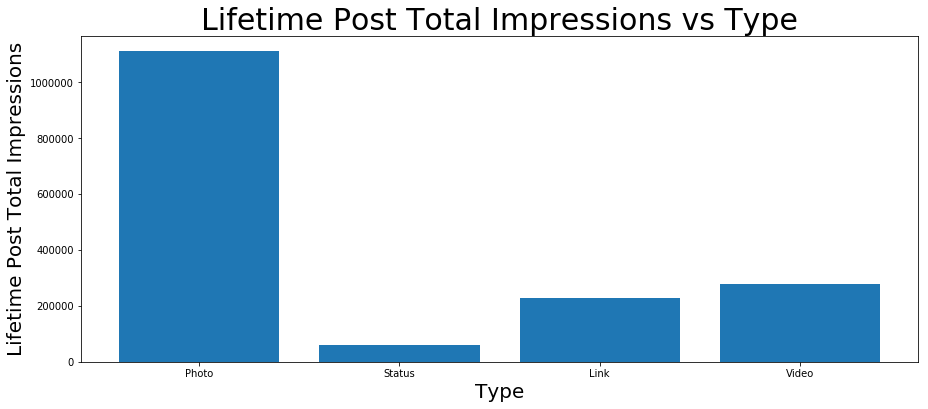

In [11]:
#========================================================================
# Analysing in details for feature Type & Lifetime Post Total Reach 
# Type 'Photo' has the highest influence to the Lifetime Post Total Reach
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Type',fontsize=30)
plt.xlabel('Type',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Type'], FB_df_rename['Impression'])
plt.savefig('Impression-Type-barchart.png',bbox_inches="tight")
plt.show()

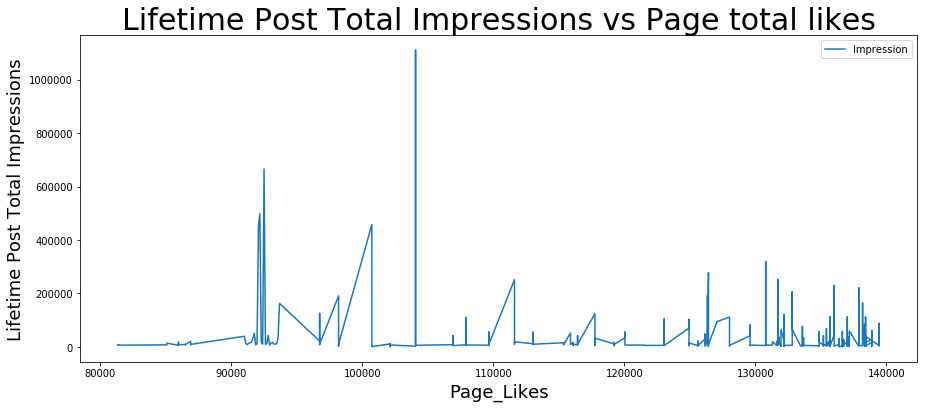

In [12]:
#====================================================================================
# Analysing in details for feature Page Total Impressions & Lifetime Post Total Reach 
# 
#====================================================================================

#to create a x-axis numbering so that the x_label can be turned vertical for readability
#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Page total likes',fontsize=30)
plt.xlabel('Page_Likes',fontsize=18)
plt.ylabel('Lifetime Post Total Impressions',fontsize=18)

plt.xticks(fontsize=10)

#Ready to plot the line chart
plt.plot(FB_df_rename['Page_Likes'],FB_df_rename['Impression'])

legend = plt.legend()
plt.savefig('Impression-Page_Like-linechart.png',bbox_inches="tight")
plt.show()

In [13]:
FB_df_rename['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

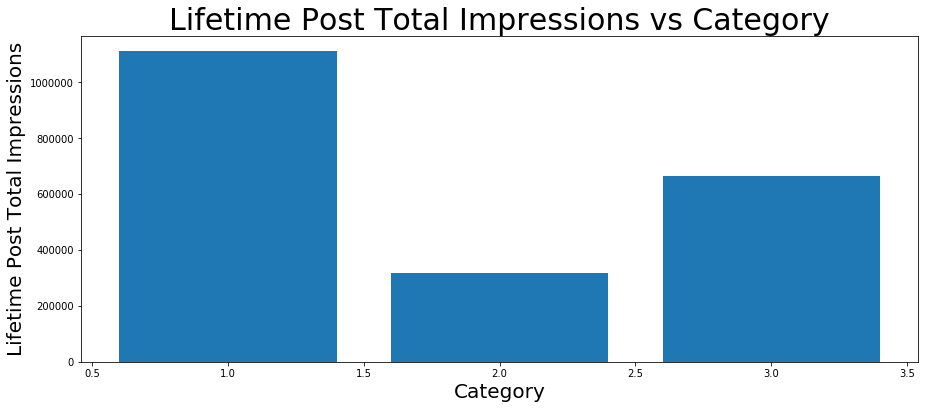

In [14]:
#===========================================================================
# Analysing in details for feature Category & Lifetime Post Total Impression 
# T
#===========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Category',fontsize=30)
plt.xlabel('Category',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Category'], FB_df_rename['Impression'])
plt.savefig('Impression-Category-barchart.png',bbox_inches="tight")
plt.show()

In [15]:
FB_df_rename['Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Month, dtype: int64

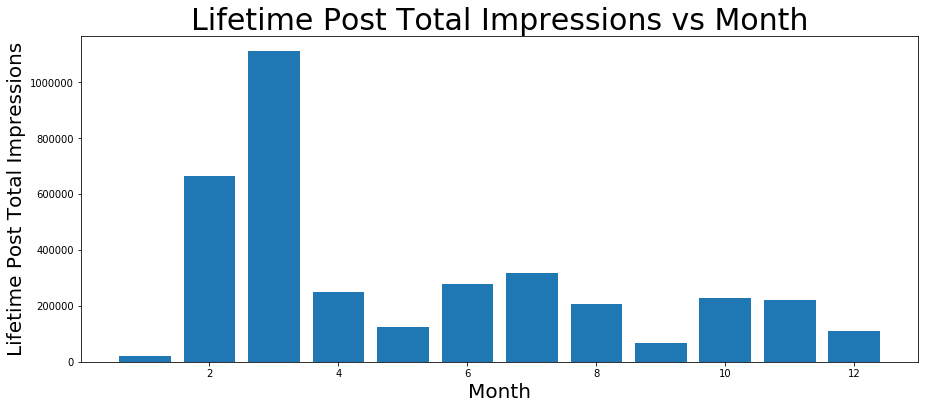

In [16]:
#=========================================================================
# Analysing in details for feature Month & Lifetime Post Total Impressions 
#=========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Month',fontsize=30)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Month'], FB_df_rename['Impression'])
plt.savefig('Impression-Month-barchart.png',bbox_inches="tight")
plt.show()

In [17]:
FB_df_rename['Weekday'].value_counts()

7    82
6    81
4    72
1    68
5    67
2    66
3    64
Name: Weekday, dtype: int64

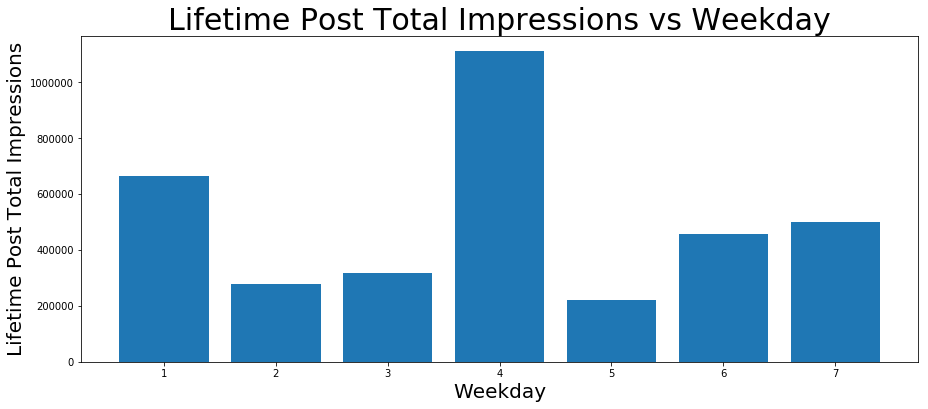

In [18]:
#===========================================================================
# Analysing in details for feature Weekday & Lifetime Post Total Impressions 
#===========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Weekday',fontsize=30)
plt.xlabel('Weekday',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Weekday'], FB_df_rename['Impression'])
plt.savefig('Impression-Weekday-barchart.png',bbox_inches="tight")
plt.show()

In [19]:
FB_df_rename['Hour'].value_counts()

3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
5      13
14     13
7      13
8      12
15      6
1       4
17      3
18      3
22      1
16      1
19      1
20      1
23      1
Name: Hour, dtype: int64

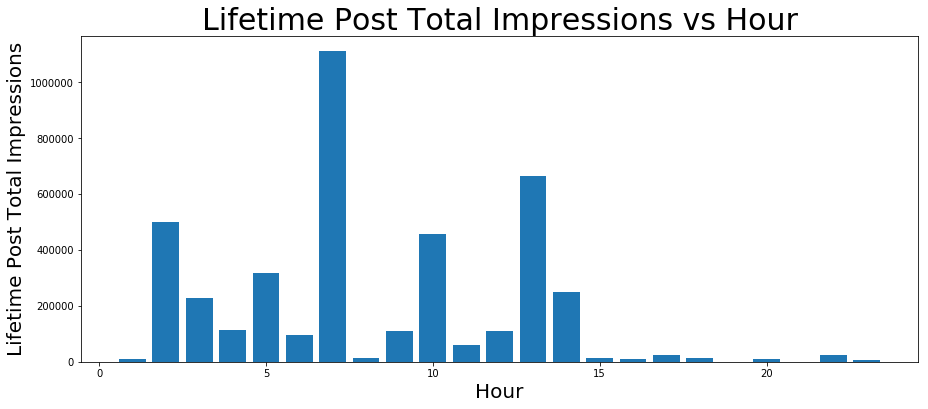

In [20]:
#========================================================================
# Analysing in details for feature Hour & Lifetime Post Total Impressions 
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Hour',fontsize=30)
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Hour'], FB_df_rename['Impression'])
plt.savefig('Impression-Hour-barchart.png',bbox_inches="tight")
plt.show()

In [21]:
FB_df_rename['Paid'].value_counts()

0.0    360
1.0    139
Name: Paid, dtype: int64

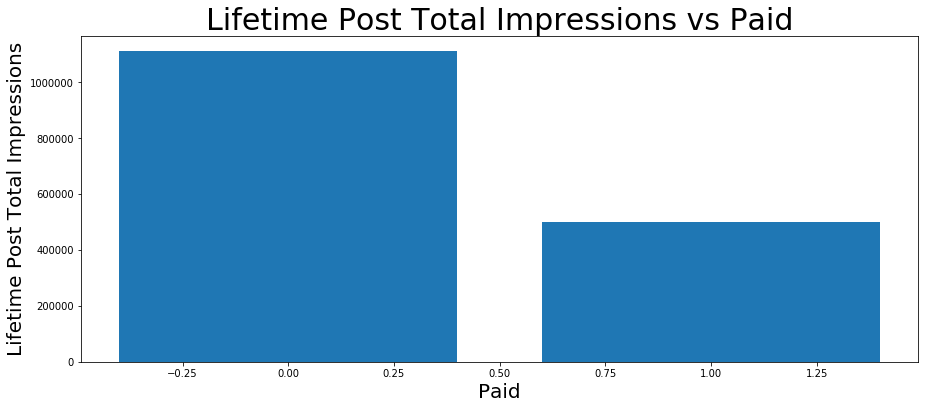

In [22]:
#========================================================================
# Analysing in details for feature Paid & Lifetime Post Total Impressions 
#========================================================================

#Format the look and feel of the graph
plt.figure(figsize=(15,6))
plt.title('Lifetime Post Total Impressions vs Paid',fontsize=30)
plt.xlabel('Paid',fontsize=20)
plt.ylabel('Lifetime Post Total Impressions',fontsize=20)

#Ready to plot the Bar chart
plt.bar(FB_df_rename['Paid'], FB_df_rename['Impression'])
plt.savefig('Impression-Paid-barchart.png',bbox_inches="tight")
plt.show()

## Features Data Normality Check

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


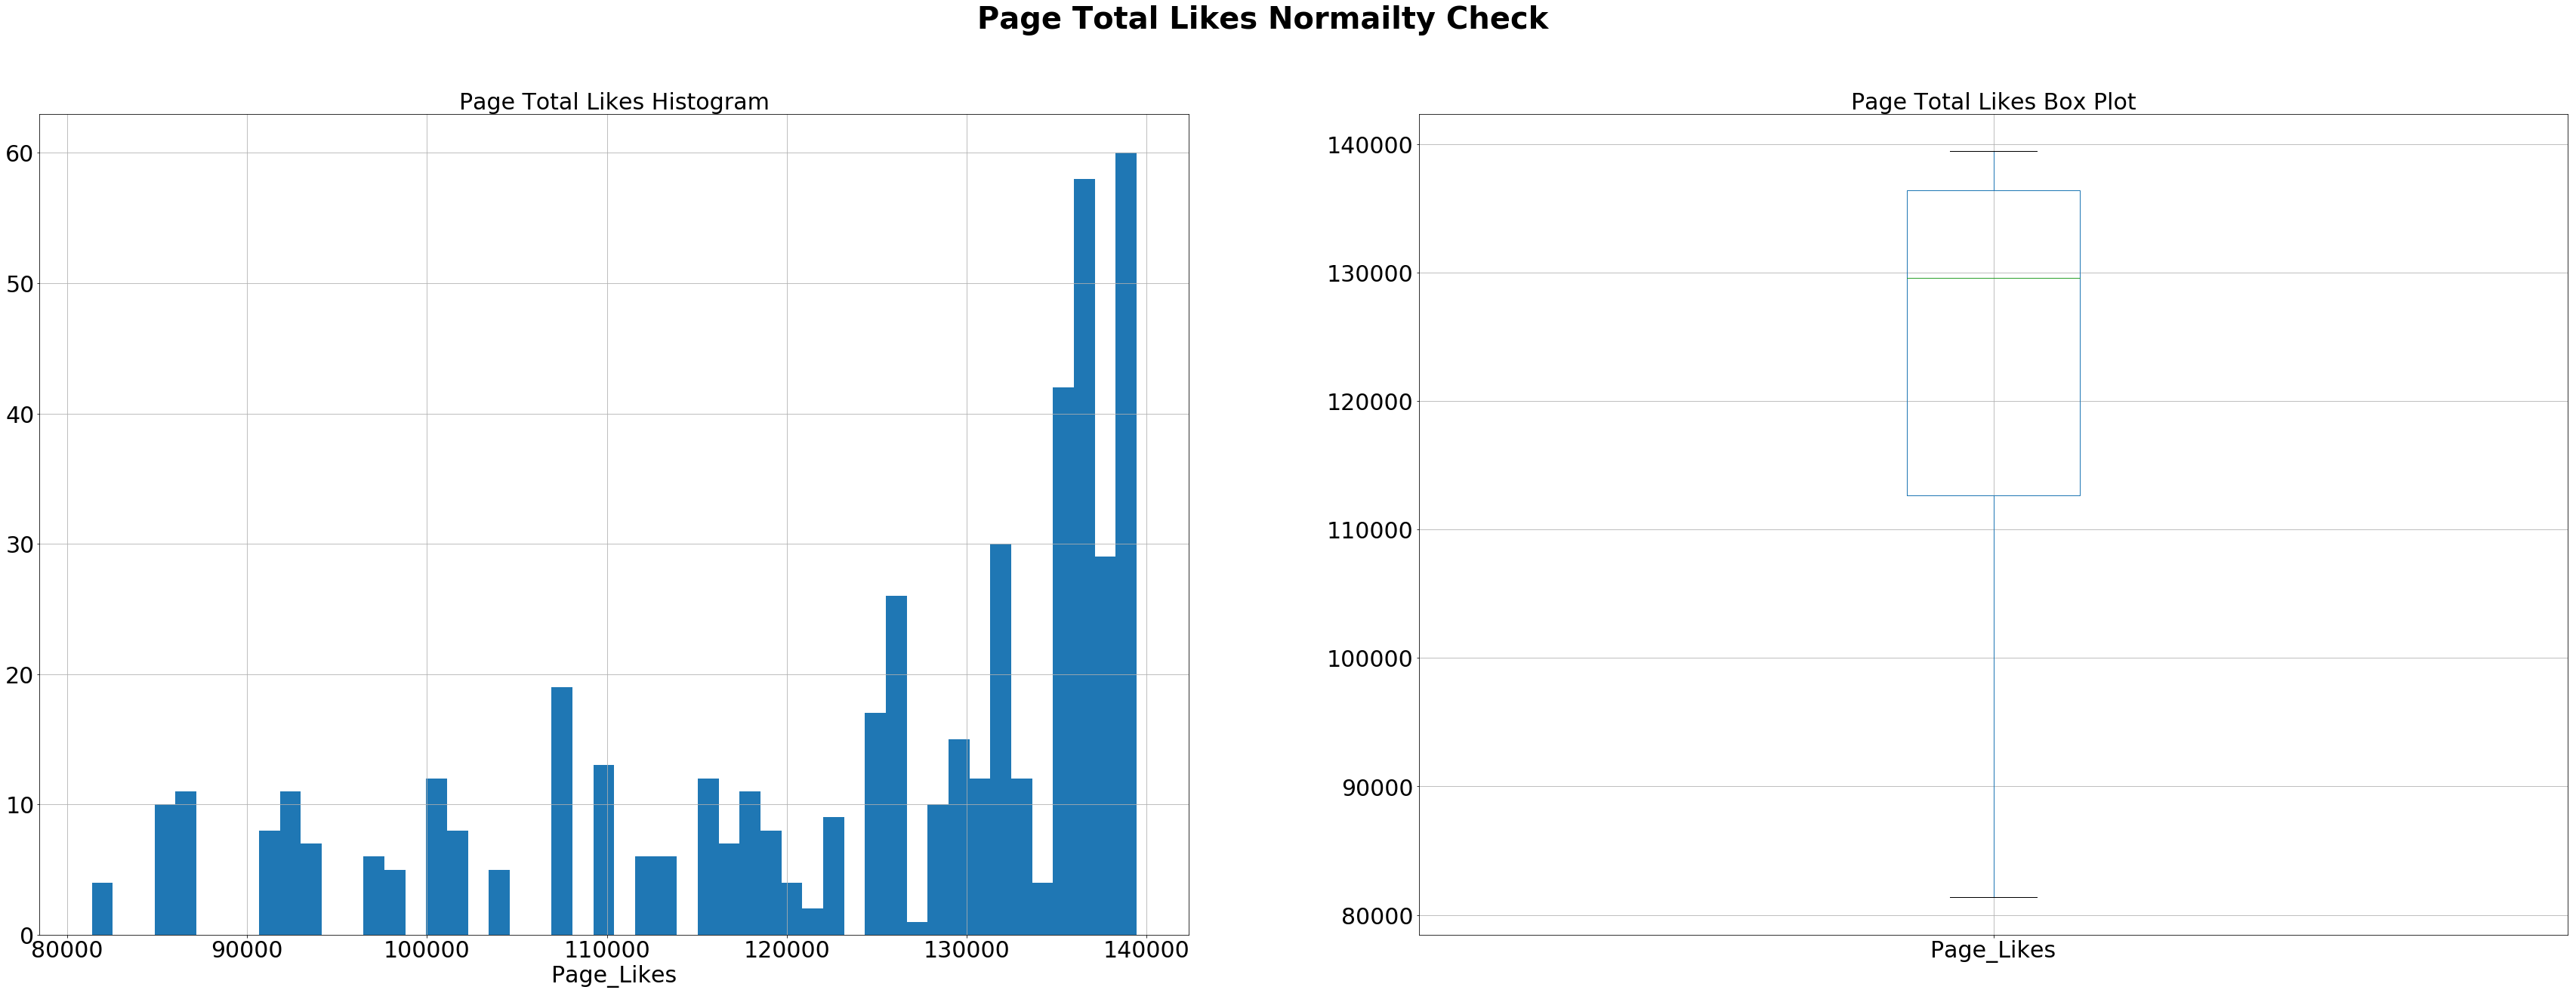

In [23]:
# Checking on Page_Likes data spread and Normality
# Seems like is more skew to the right as shown both in histogram and BoxPlot

# Ploting two figure side by side
fig = plt.figure(figsize=(60,20)) #  figure
fig.suptitle('Page Total Likes Normailty Check', fontsize=40, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.set_title('Page Total Likes Histogram', fontsize=30)
ax1.set_xlabel('Page_Likes', fontsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)
ax2 = fig.add_subplot(122)
ax2.set_title('Page Total Likes Box Plot', fontsize=30)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.yaxis.set_tick_params(labelsize=30)

plt.subplot(121) # 1st figure
FB_df_rename["Page_Likes"].hist(bins=50)

plt.subplot(122) # 2nd figure
FB_df_rename.boxplot(column='Page_Likes')
# Save the chart to file
plt.savefig("Page_Likes Normality Check.png", bbox_inches="tight")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


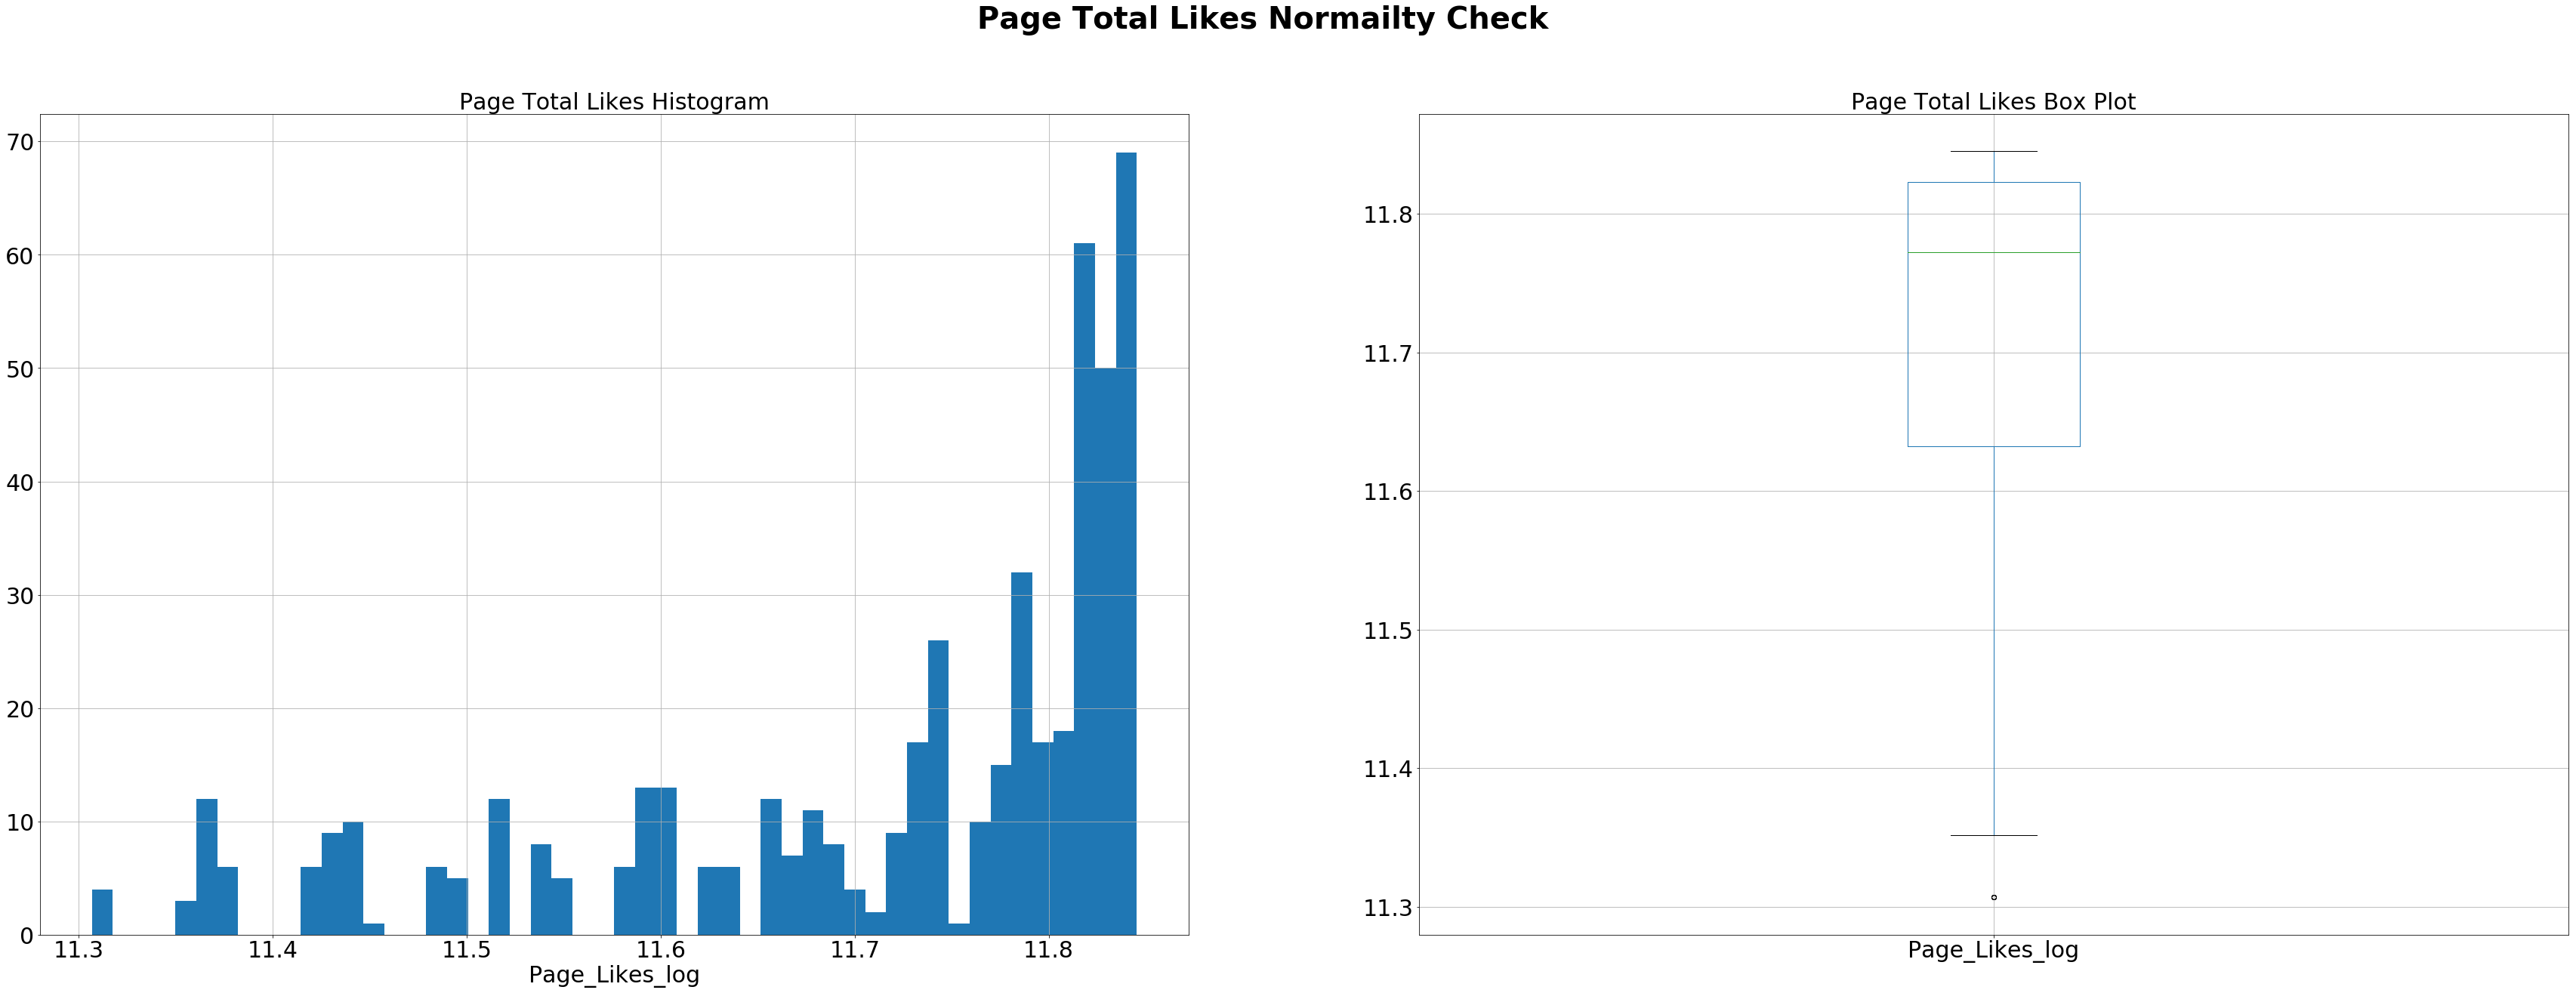

In [24]:
# So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

FB_df_rename['Page_Likes_log'] = np.log(FB_df_rename['Page_Likes'])
#FB_df_rename['Page_Likes_log'].hist(bins=20)

# Ploting two figure side by side
fig = plt.figure(figsize=(60,20)) #  figure
fig.suptitle('Page Total Likes Normailty Check', fontsize=40, fontweight='bold')
ax1 = fig.add_subplot(121)
ax1.set_title('Page Total Likes Histogram', fontsize=30)
ax1.set_xlabel('Page_Likes_log', fontsize=30)
ax1.xaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)
ax2 = fig.add_subplot(122)
ax2.set_title('Page Total Likes Box Plot', fontsize=30)
ax2.xaxis.set_tick_params(labelsize=30)
ax2.yaxis.set_tick_params(labelsize=30)

plt.subplot(121) # 1st figure
FB_df_rename["Page_Likes_log"].hist(bins=50)

plt.subplot(122) # 2nd figure
FB_df_rename.boxplot(column='Page_Likes_log')
# Save the chart to file
plt.savefig("Page_Likes Log.png", bbox_inches="tight")

<h1><center>II - Feature engineering</center></h1> 

In [25]:
#*************************************************************************
#               Processing Missing Data
#*************************************************************************

# Processing the FB_df_rename null values
# Remove rows where is null 
FB_df_rename = FB_df_rename.dropna()

In [26]:
FB_df_rename.count()

Page_Likes           495
Type                 495
Category             495
Month                495
Weekday              495
Hour                 495
Paid                 495
Reach                495
Impression           495
Engage               495
Consumers            495
Consumptions         495
Impression_ByLike    495
Reach_ByLike         495
Engage_ByLike        495
comment              495
like                 495
share                495
Interactions         495
Page_Likes_log       495
dtype: int64

In [27]:
#*************************************************************************
# Since, sklearn requires all inputs to be numeric, we should convert all 
# our categorical variables into numeric by encoding the categories. Before
# that we will fill all the missing values in the dataset. This can be done 
# using the following code: 
#*************************************************************************

FB_df_Encode = pd.get_dummies(FB_df_rename, columns=['Type','Category'])
FB_df_Encode.head()

,Page_Likes,Month,Weekday,Hour,Paid,Reach,Impression,Engage,Consumers,Consumptions,...,share,Interactions,Page_Likes_log,Type_Link,Type_Photo,Type_Status,Type_Video,Category_1,Category_2,Category_3
0,139441,12,4,3,0.0,2752,5091,178,109,159,...,17.0,100,11.845397,0,1,0,0,0,1,0
1,139441,12,3,10,0.0,10460,19057,1457,1361,1674,...,29.0,164,11.845397,0,0,1,0,0,1,0
2,139441,12,3,3,0.0,2413,4373,177,113,154,...,14.0,80,11.845397,0,1,0,0,0,0,1
3,139441,12,2,10,1.0,50128,87991,2211,790,1119,...,147.0,1777,11.845397,0,1,0,0,0,1,0
4,139441,12,2,3,0.0,7244,13594,671,410,580,...,49.0,393,11.845397,0,1,0,0,0,1,0


In [28]:
FB_df_Encode.count()

Page_Likes           495
Month                495
Weekday              495
Hour                 495
Paid                 495
Reach                495
Impression           495
Engage               495
Consumers            495
Consumptions         495
Impression_ByLike    495
Reach_ByLike         495
Engage_ByLike        495
comment              495
like                 495
share                495
Interactions         495
Page_Likes_log       495
Type_Link            495
Type_Photo           495
Type_Status          495
Type_Video           495
Category_1           495
Category_2           495
Category_3           495
dtype: int64

<h1><center>III - Modeling</center></h1> 

In [29]:
#=========================================================================
# Train and test split 
#=========================================================================
from sklearn.model_selection import train_test_split

FeaturesNames = ['Page_Likes','Month','Weekday','Hour','Paid','Type_Link','Type_Photo',
                 'Type_Status','Type_Video','Category_1','Category_2','Category_3']
Target = ['Impression']
X = FB_df_Encode[FeaturesNames]
y = FB_df_Encode[Target]

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=5,shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(396, 12) (396, 1)
(99, 12) (99, 1)


In [30]:
X_test.columns

Index(['Page_Likes', 'Month', 'Weekday', 'Hour', 'Paid', 'Type_Link',
       'Type_Photo', 'Type_Status', 'Type_Video', 'Category_1', 'Category_2',
       'Category_3'],
      dtype='object')

In [48]:
#=========================================================================
# Next, we will import the required modules. Then we will define a generic 
# classification function, which takes a model as input and determines the 
# Accuracy and Cross-Validation scores.
#=========================================================================

#Import models from scikit learn module:
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.svm import SVC
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn import metrics 


# function to compute mean absolute error %
def mean_abs_error_percent(y_true, y_pred):
    diff = (np.abs(y_true - y_pred)) / y_true
    mean = np.sum(diff)/ y_true.count()
    return mean * 100; # return percent
    
#Generic function for making a classification model and accessing performance:

#-----------------------------------------------------------------
# Function for Regressor Evaluation
#-----------------------------------------------------------------
def regression_model_Tree(model, X_train,y_train):
  #Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=10, shuffle=True,random_state=None)
  error = []
  r2_list  = []
  variance = []
  mae_list = []
  mse_list = []
    
  for train, test in kf.split(X_train):
    # Filter training data
    train_predictors = (X_train.iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Make predictions on training set:
    KFpredictions = model.predict(X_train.iloc[test,:])
    
    #Record error from each cross-validation run
    error.append(model.score(X_train.iloc[test,:], y_train.iloc[test]))
        
    #Print error
    r2_list.append(metrics.r2_score(y_train.iloc[test],KFpredictions))
    mae_list.append(metrics.mean_absolute_error(y_train.iloc[test], KFpredictions))
    mse_list.append(metrics.mean_squared_error(y_train.iloc[test], KFpredictions))
    variance.append(metrics.explained_variance_score(y_train.iloc[test], KFpredictions))
    
  print ('*************************************************************')
  print ('KFold Regression Report : ')
  print ("Error          : " , np.mean(error))
  print ("R2 Score       : " , np.mean(r2_list))
  print ("Mean Abs Error : ", np.mean(mae_list))
  print ("Mean Sq  Error : ", np.mean(mse_list))
  print ("Variance Score :  ", np.mean(variance))  
  print ('*************************************************************')
      
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train) 
   

In [39]:
def KFold_regression(model, X_train,y_train):
  #Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=10, shuffle=True,random_state=None)
  error = []
  r2_list  = []
  variance = []
  mae_list = []
  mse_list = []
    
  for train, test in kf.split(X_train):
    # Filter training data
    train_predictors = (X_train.iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Make predictions on training set:
    KFpredictions = model.predict(X_train.iloc[test,:])
    
    #Record error from each cross-validation run
    error.append(model.score(X_train.iloc[test,:], y_train.iloc[test]))
        
    #Print error
    r2_list.append(metrics.r2_score(y_train.iloc[test],KFpredictions))
    mae_list.append(metrics.mean_absolute_error(y_train.iloc[test], KFpredictions))
    mse_list.append(metrics.mean_squared_error(y_train.iloc[test], KFpredictions))
    variance.append(metrics.explained_variance_score(y_train.iloc[test], KFpredictions))
    
  print ('*************************************************************')
  print ('KFold Regression Report : ')
  print ("Error          : " , np.mean(error))
  print ("R2 Score       : " , np.mean(r2_list))
  print ("Mean Abs Error : ", np.mean(mae_list))
  print ("Mean Sq  Error : ", np.mean(mse_list))
  print ("Variance Score :  ", np.mean(variance))  
  print ('*************************************************************')
      
  #Fit the model again so that it can be refered outside the function:
  model.fit(X_train,y_train)

In [40]:
# Checking on the feature importance weightage
def features_importance(clf, X_train, y_train, FeaturesNames):
    target = y_train
    train = X_train
    
    clf = clf.fit(train,target)
    
    features = pd.DataFrame()
    features['feature'] = train.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    print ('*************************************************************')
    features.plot(title = 'Features Importance',fontsize= 30, kind='barh', figsize=(50, 10))
    featimp = pd.Series(clf.feature_importances_, index=FeaturesNames).sort_values(ascending=False)
    print (featimp)
    print('\n**********************************************************')
    pieFeat = pd.DataFrame(featimp)
    fig1, ax1 = plt.subplots()
    ax1.pie(featimp, labels=pieFeat.index, autopct='%1.1f%%',shadow=True, startangle=90)
    

In [41]:
#*************************************************************************************
# Testing of features ['Page_Likes','Type','Category','Month','Weekday','Hour','Paid']
#*************************************************************************************

In [42]:
# Dummy Regression test

model = DummyRegressor()
regression_model_Tree(model, X_train,y_train)

*************************************************************
KFold Regression Report : 
Error          :  -0.10559610602371758
R2 Score       :  -0.10559610602371758
Mean Abs Error :  30968.251305255748
Mean Sq  Error :  6199884751.648019
Variance Score :   3.3306690738754695e-17
*************************************************************


In [43]:
# Linear Regression test

model = LinearRegression(normalize=True)
regression_model_Tree(model, X_train,y_train)


*************************************************************
KFold Regression Report : 
Error          :  -0.6124074727984232
R2 Score       :  -0.6124074727984232
Mean Abs Error :  31601.877495029785
Mean Sq  Error :  6199832239.197287
Variance Score :   -0.2834558681493086
*************************************************************


*************************************************************
KFold Regression Report : 
Error          :  -4.7273183026223204
R2 Score       :  -4.7273183026223204
Mean Abs Error :  38105.53586538461
Mean Sq  Error :  12026538589.526972
Variance Score :   -4.451468037289059
*************************************************************
*************************************************************
Weekday        0.402712
Page_Likes     0.367608
Paid           0.090013
Hour           0.087025
Category_1     0.021628
Month          0.015955
Type_Video     0.006333
Category_3     0.003858
Type_Photo     0.003102
Category_2     0.001155
Type_Link      0.000446
Type_Status    0.000165
dtype: float64

**********************************************************


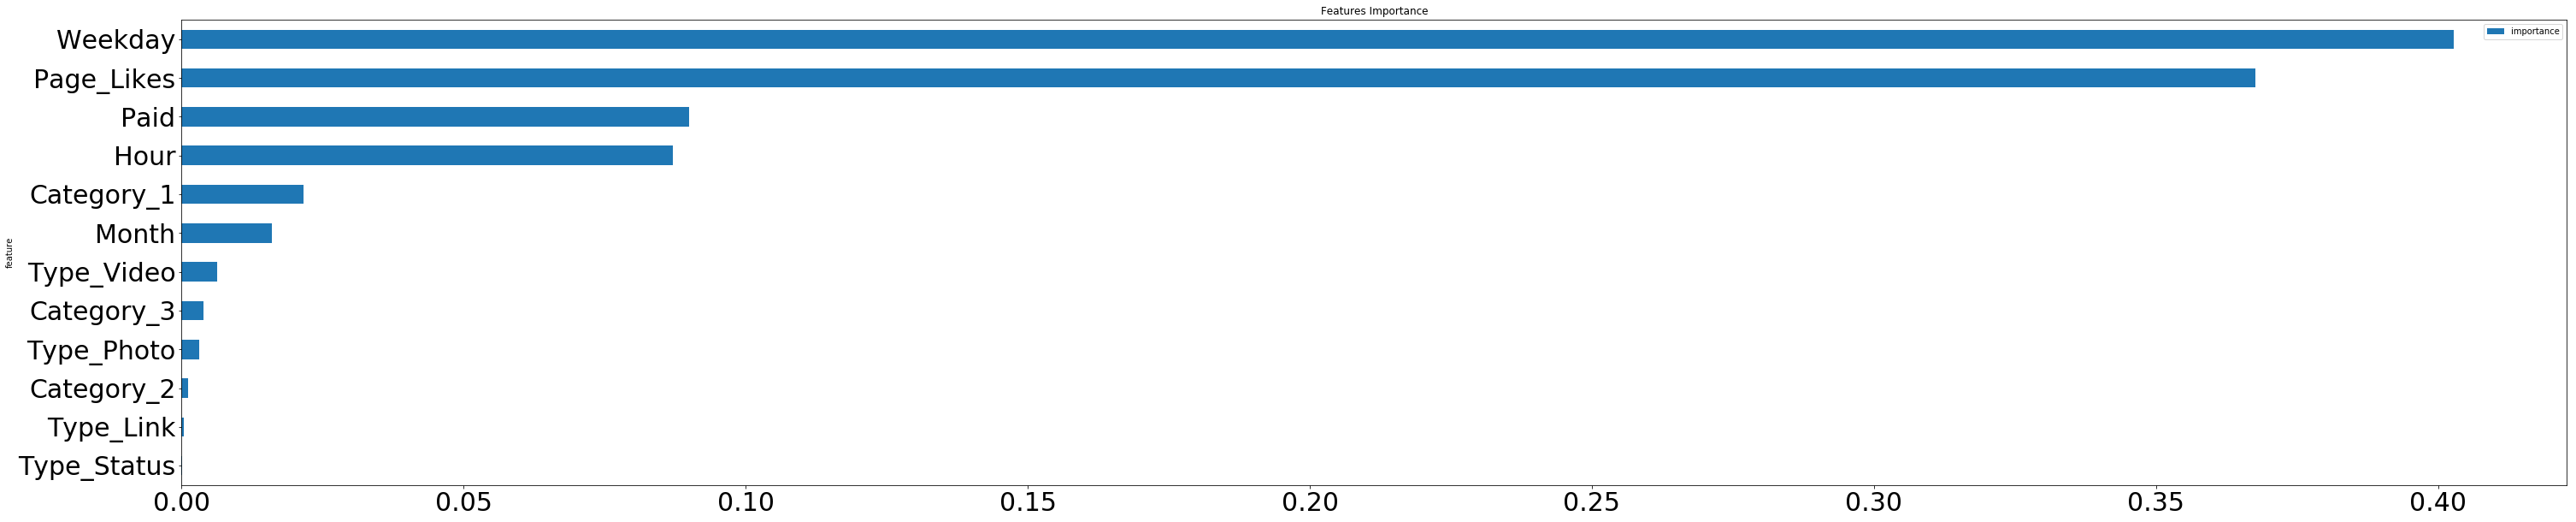

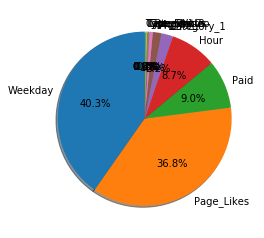

In [44]:
model = DecisionTreeRegressor()
regression_model_Tree(model, X_train,y_train)
features_importance(model, X_train,y_train,FeaturesNames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DataConversionWarning: A column-vec

*************************************************************
KFold Regression Report : 
Error          :  -0.7268074293155096
R2 Score       :  -0.7268074293155096
Mean Abs Error :  34219.10603717719
Mean Sq  Error :  7503502605.62896
Variance Score :   -0.6604657514805521
*************************************************************
*************************************************************
Page_Likes     0.400285
Hour           0.227444
Weekday        0.141065
Month          0.107135
Category_1     0.035427
Paid           0.029827
Type_Video     0.017485
Category_3     0.016166
Type_Status    0.009410
Type_Photo     0.008287
Type_Link      0.005886
Category_2     0.001584
dtype: float64

**********************************************************


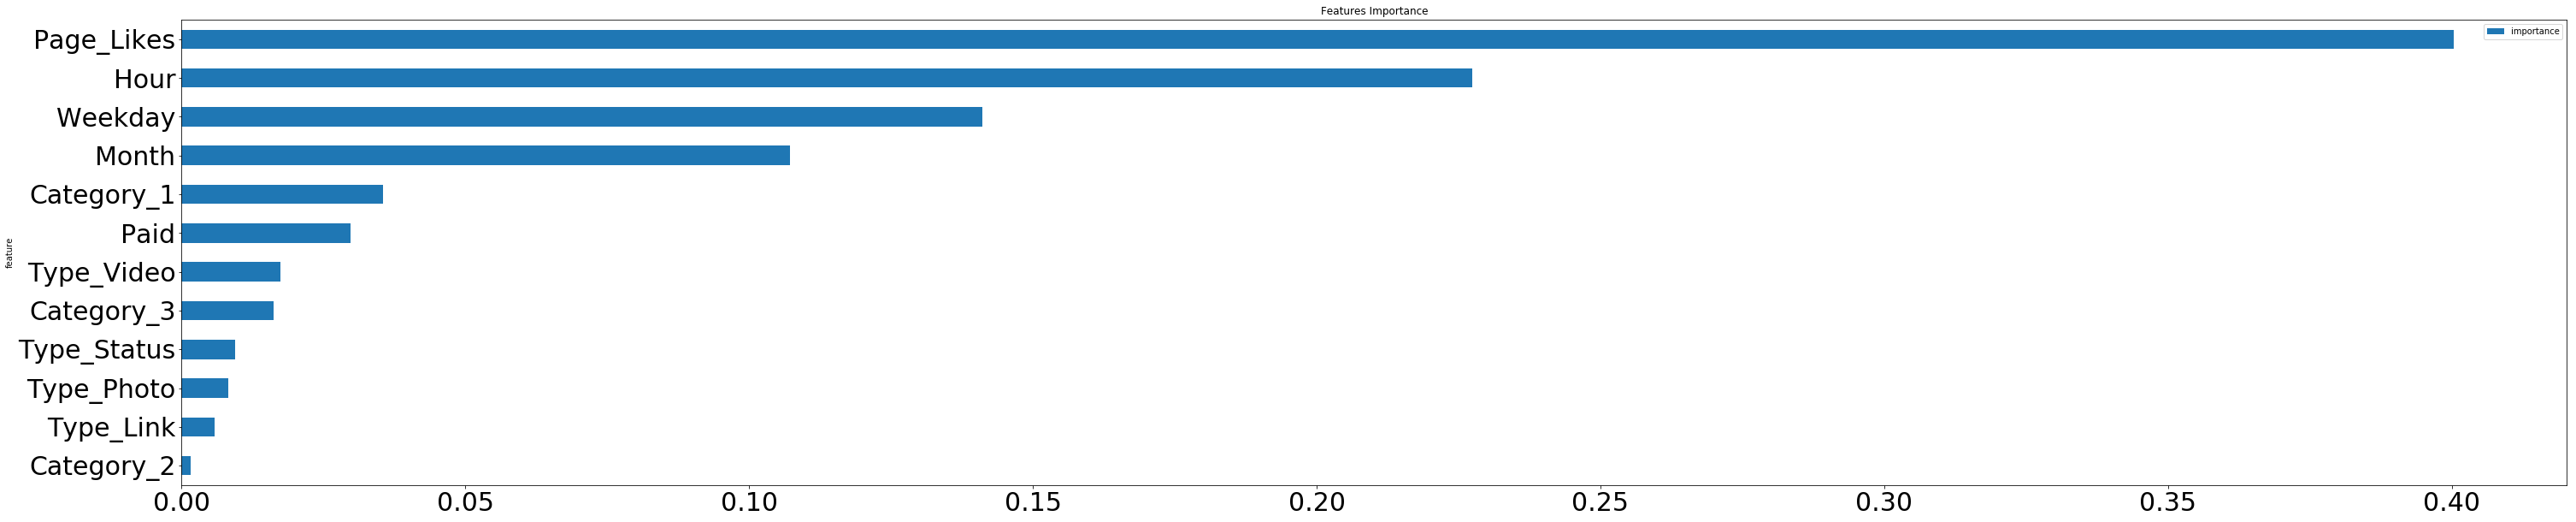

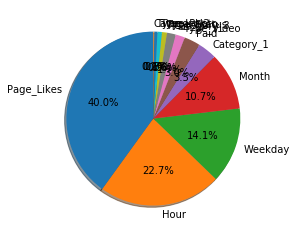

In [45]:
model = RandomForestRegressor(n_estimators=100,oob_score=True)
regression_model_Tree(model, X_train,y_train)
features_importance(model, X_train,y_train,FeaturesNames)

In [47]:
model = Lasso(normalize=True)
regression_model_Tree(model, X_train,y_train)


*************************************************************
KFold Regression Report : 
Error          :  -0.2705517362316195
R2 Score       :  -0.2705517362316195
Mean Abs Error :  31294.316282235883
Mean Sq  Error :  6249899034.476306
Variance Score :   -0.19162583645792433
*************************************************************


In [49]:
model = SVC(kernel='linear')
regression_model_Tree(model, X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -3.8227842232412903
Mean Abs Error :  32782.20416666667
Mean Sq  Error :  8645029499.272758
Variance Score :   -3.669903978110655
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [50]:
model = SVC(kernel='rbf')
regression_model_Tree(model, X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.7664304630695506
Mean Abs Error :  28535.68826923077
Mean Sq  Error :  6996987852.869551
Variance Score :   -0.726627107326441
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
#*************************************************************************************
# Testing of features ['Hour','Page_Likes','Paid','Weekday','Category','Month']
#*************************************************************************************

In [52]:
# Since the top 6 features in SVC 'RBF' kernel shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName6s = ['Hour','Page_Likes','Paid','Weekday','Category_1','Category_2','Category_3','Month']
Target6 = ['Impression']

X_train_6 = X_train[FeaturesName6s]
y_train_6 = y_train


In [53]:
model = SVC(kernel='rbf')
regression_model_Tree(model, X_train_6,y_train_6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.5200994506656305
Mean Abs Error :  29113.019807692308
Mean Sq  Error :  7180474539.920448
Variance Score :   -0.47695778663948635
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
#*************************************************************************************
# Testing of features ['Hour','Page_Likes','Paid','Weekday','Category']
#*************************************************************************************

In [54]:
# Since the top 5 features in SVC 'RBF' kernel shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName5s = ['Hour','Page_Likes','Paid','Weekday','Category_1','Category_2','Category_3']
Target5 = ['Impression']

X_train_5 = X_train[FeaturesName5s]
y_train_5 = y_train

In [55]:
model = model = SVC(kernel='rbf')
regression_model_Tree(model, X_train_5,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.4050714524130495
Mean Abs Error :  27758.226217948715
Mean Sq  Error :  6840927073.2294235
Variance Score :   -0.3400435438864314
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
#*************************************************************************************
# Testing of features ['Hour','Page_Likes','Weekday','Category']
#*************************************************************************************

In [56]:
# Since the top 4 features in SVC 'RBF' kernel shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName4s = ['Hour','Page_Likes','Weekday','Category_1','Category_2','Category_3']
Target4 = ['Impression']

X_train_4 = X_train[FeaturesName4s]
y_train_4 = y_train

In [57]:
model = SVC(kernel='rbf')
regression_model_Tree(model, X_train_4,y_train_4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.6652204862890826
Mean Abs Error :  29083.553012820514
Mean Sq  Error :  7163466368.920448
Variance Score :   -0.6160087607695172
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
#*************************************************************************************
# Testing of features ['Hour','Page_Likes','Weekday']
#*************************************************************************************

In [58]:
# Since the top 3 features in SVC 'RBF' kernel shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName3s = ['Hour','Page_Likes','Weekday']
Target3 = ['Impression']

X_train_3 = X_train[FeaturesName3s]
y_train_3 = y_train

In [60]:
model = SVC(kernel='rbf')
regression_model_Tree(model, X_train_3,y_train_3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.6085048113554324
Mean Abs Error :  28856.86006410256
Mean Sq  Error :  7008618514.905705
Variance Score :   -0.5505899671182326
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h1><center>IV - Hyperparameters tuning</center></h1>  

In [62]:
# Since the top 4 features in RandomForest Regressor shows significant influence factor, 
# The following will use the top 3-6 features to see if is good enough.

FeaturesName5s = ['Hour','Page_Likes','Paid','Weekday','Category_1','Category_2','Category_3']
Target5 = ['Impression']

X_train_5 = X_train[FeaturesName6s]
y_train_5 = y_train
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [64]:
from sklearn.model_selection import GridSearchCV
#metrics.SCORERS.keys() - check scoring options

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cross_validation = KFold(n_splits=10, shuffle=True,random_state=None)

grid_search = GridSearchCV(SVC(kernel='rbf'), 
                           scoring='neg_mean_absolute_error',
                           param_grid = param_grid, 
                           cv=cross_validation,
                           n_jobs=-1)

grid_search.fit(X_train_5,y_train_5)
model = grid_search
parameters = grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
model = SVC(**parameters)
model.fit(X_train_6,y_train_6)

Best score: -23467.881313131315
Best parameters: {'C': 0.001, 'gamma': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
regression_model_Tree(model, X_train_5,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.15600715924282138
Mean Abs Error :  23552.081474358973
Mean Sq  Error :  6545059779.887372
Variance Score :   -0.0009153766209071268
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h1><center> VI - Submission of test data and results</center></h1>   

In [54]:
# For Supprt Vector Machine

In [68]:
FeaturesName5s = ['Hour','Page_Likes','Paid','Weekday','Category_1','Category_2','Category_3']
Target5 = ['Impression']

X_train_5 = X_train[FeaturesName6s]
y_train_5 = y_train

model = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

regression_model_Tree(model, X_train_5,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -0.1586281383335489
Mean Abs Error :  23458.908205128206
Mean Sq  Error :  6524658657.90782
Variance Score :   -0.0021398847441068012
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# Supprt Vector Machine test

model = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

regression_model_Tree(model, X_test,y_test)

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -494.86652615527476
Mean Abs Error :  149285.0211111111
Mean Sq  Error :  60418027145.41222
Variance Score :   -229.51045811624522
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

 <h1><center>V - Saving the trained Model</center></h1>  

In [70]:
# We can save the trained model clf using pickle 
import pickle

model = SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

regression_model_Tree(model, X_test,y_test)

s = pickle.dumps(model)
pickle.dump(model, open( "FB_Impression_trained_model.p", "wb" ) )
#model2 = pickle.load( open( "Titanic_trained_model.p", "rb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
from sklearn.externals import joblib
joblib.dump(model, 'FB_Impression_trained_model.pkl') 
#model3 = joblib.load('Titanic_trained_model.pkl')

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -159.37830832313188
Mean Abs Error :  154187.72444444447
Mean Sq  Error :  63299446874.571106
Variance Score :   -116.92022849940005
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

['FB_Impression_trained_model.pkl']

In [71]:
# Supprt Vector Machine test
model2 = pickle.load( open( "FB_Impression_trained_model.p", "rb" ) )
regression_model_Tree(model2, X_test,y_test)

*************************************************************
KFold Regression Report : 
Error          :  0.0
R2 Score       :  -140.61676120445432
Mean Abs Error :  147698.24777777778
Mean Sq  Error :  59240574173.12334
Variance Score :   -87.88214706385507
*************************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 